# Imports: -

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Drive link for Loan-Case-Study Data: [click here](https://drive.google.com/drive/folders/1ZCGdnc0rrVgdr16nqaCptx0ODKhSjQ7Y?usp=sharing)

In [2]:
df = pd.read_csv('data//application_data.csv')
old_df = pd.read_csv('data//previous_application.csv')
desc = pd.read_csv('data//columns_description.csv')

# Data overview:  -

In [3]:
desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# All columns of the applications dataset: -

In [5]:
df.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# Dimensions of the dataset: -

In [6]:
print("Number of rows of the dataset: ", df.shape[0])
print("Number of rows of the dataset: ", df.shape[1])

Number of rows of the dataset:  307511
Number of rows of the dataset:  122


### There are 122 features including the Target variable.

# Previous years application  dataset: -

In [7]:
old_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Number of rows of the dataset: ", old_df.shape[0])
print("Number of rows of the dataset: ", old_df.shape[1])

Number of rows of the dataset:  1670214
Number of rows of the dataset:  37


In [9]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# Numerical columns: -

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

# Missing Values: -

In [11]:
# x[x[0] > 0].sort_values(by=0, ascending=True)
x = num_cols.isna().sum().to_frame()
x[x[0] > 0][x[0] < 100000].sort_values(by=0, ascending=True)

C:\Users\vishn\AppData\Local\Temp/ipykernel_1644/3612800000.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x[x[0] > 0][x[0] < 100000].sort_values(by=0, ascending=True)


,0
DAYS_LAST_PHONE_CHANGE,1
CNT_FAM_MEMBERS,2
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
EXT_SOURCE_2,660
OBS_30_CNT_SOCIAL_CIRCLE,1021
DEF_30_CNT_SOCIAL_CIRCLE,1021
OBS_60_CNT_SOCIAL_CIRCLE,1021
DEF_60_CNT_SOCIAL_CIRCLE,1021
AMT_REQ_CREDIT_BUREAU_HOUR,41519


# Handling Missing Data: -

In [12]:
to_be_filled = ['DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### `DAYS_LAST_PHONE_CHANGE` being missing could either mean the customer hasnt changed his phone No or customer didnt fill this blank. So leaving it as it is would be better than filling in wrong values.

### `CNT_FAM_MEMBERS` being missing could only mean that the customer didnt fill the blank. Taking the mean of the whole data set should help in this case to fill in the missing values.

### `AMT_ANNUITY` are regular deposits and it cannot be filled with dummy values. 

In [13]:
# Mean of df['CNT_FAM_MEMBERS']
int(np.mean(df.CNT_FAM_MEMBERS))                # rounded of to the nearest integer value since family members cannot be a floating point value

2

In [14]:
# Filling missing value
df.CNT_FAM_MEMBERS.fillna(int(np.mean(df.CNT_FAM_MEMBERS)), inplace=True)
df.CNT_FAM_MEMBERS.isna().sum()

0

In [15]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Outliers: -

In [16]:
num_cols.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [17]:
len(num_cols.columns.to_list())

106

## Possible outlier columns: -

In [18]:
outlier_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE']

### Box plot for the `outlier_cols`: -

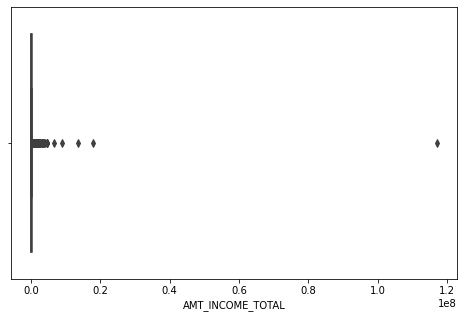

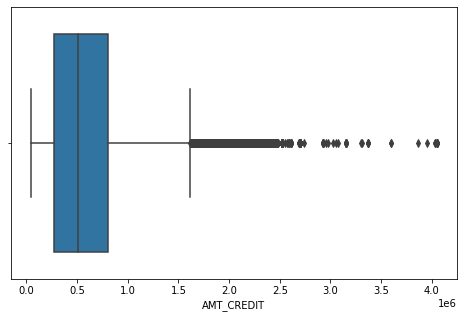

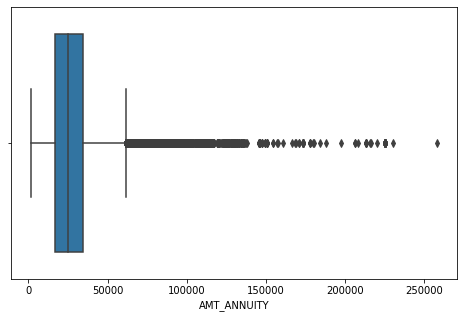

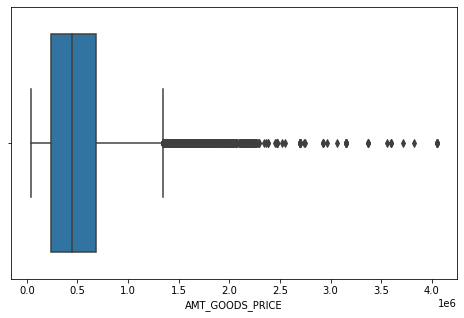

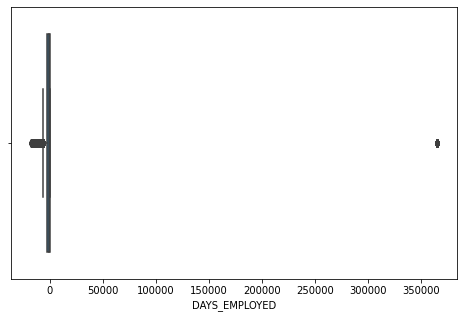

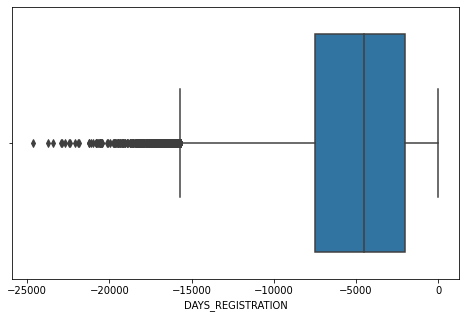

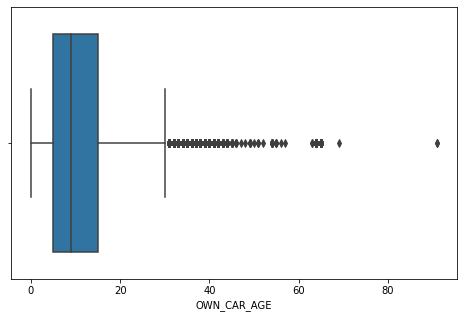

In [19]:
for i in outlier_cols:
    fig = plt.figure(figsize=(8,5))
    sns.boxplot(x=i, data=df)
    plt.show()

## Removal of outliers: -

### `AMT_INCOME_TOTAL` has an outlier with around 1.2 * 10^8 as his/her salary. This particular data will skew the dataset so it will be removed.

### `AMT_CREDIT` has some decent outliers but it cannot be removed since it's not a false Data but an exceptional case. Some Outliers will be removed.

### `AMT_ANNUITY` also has some significant outliers and will be removed.

### same goes with `AMT_GOODS_PRICE`. Outlier wont be removed.

### `DAYS_EMPLOYED` has an outlier having its value above 350000. This many days is equivalent to atleast 900 years which is completely impossible so this data can be classified as False data and will be removed.

### `OWN_CAR_AGE` also has an outlier sitting at around 70 years of a cars Age. A car being at the age of 70 cannot  be taken as a significantt value based data since it needs to be financially valuable. So this outlier will be rmoved as well.

#### All the above stated outliers have a significant effect on the analysis and is also making the data skewed so these outliers need to be removed to prevent the data from skewing.

In [20]:
# Filter for outliers: -
significant_outliers = df.loc[(df['DAYS_EMPLOYED'] > 22000) | (df['AMT_ANNUITY'] > 140000) | (df['AMT_INCOME_TOTAL'] > 1400000) | (df['AMT_CREDIT'] > 3500000) | (df['AMT_GOODS_PRICE'] > 2300000) | (df['OWN_CAR_AGE'] > 50)].index.values.tolist()

In [21]:
# Removing the outliers: -
df.drop(labels=significant_outliers, inplace=True)

## BOX PLOT after removing the outliers: -

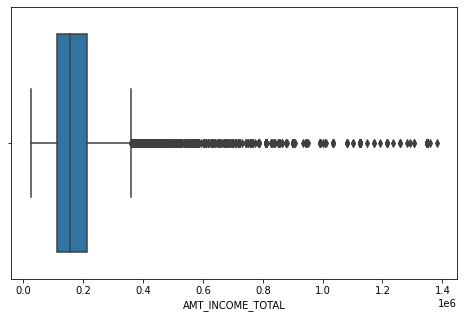

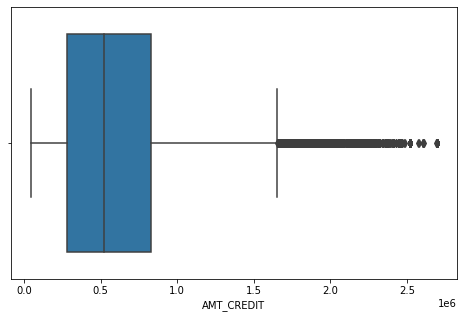

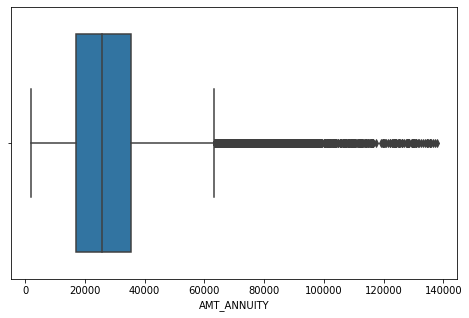

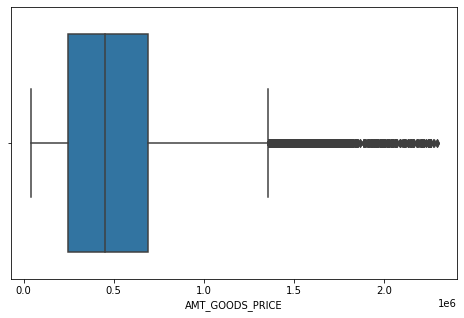

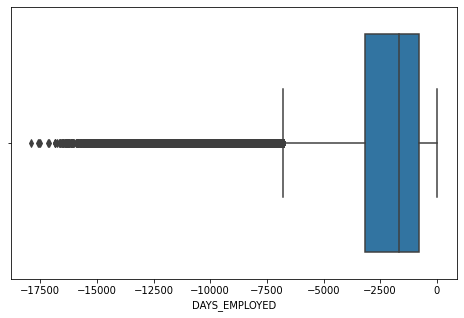

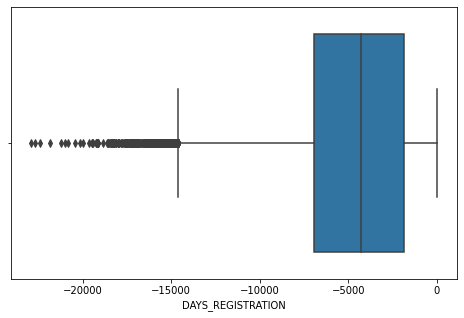

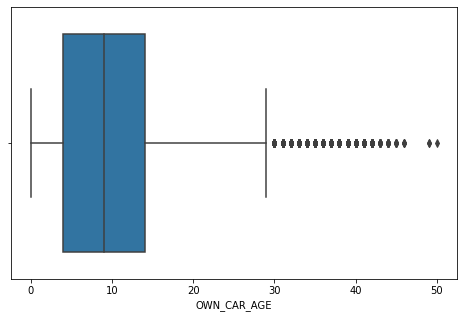

In [22]:
for i in outlier_cols:
    fig = plt.figure(figsize=(8,5))
    sns.boxplot(x=i, data=df)
    plt.show()

### Dataset had `307511` number of rows before removing the outliers

In [23]:
# Shape of the dataSet after removing the outliers:
df.shape

(248816, 122)

### Number of outliers removed in total: -

In [24]:
print("No. of rows removed as outliers:", 307511 - df.shape[0])

No. of rows removed as outliers: 58695


# UNIVARIATE Analysis: -

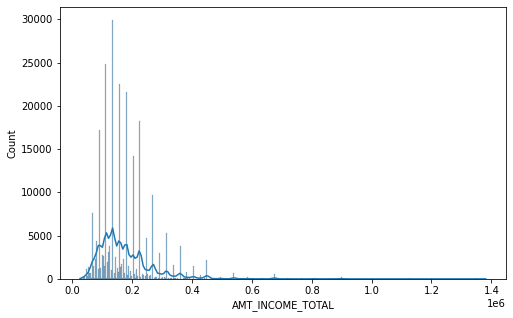

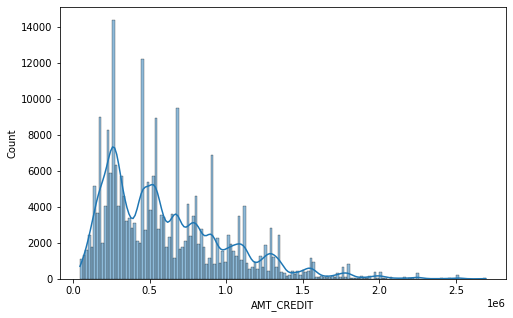

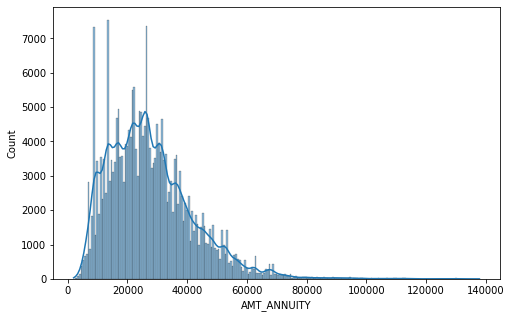

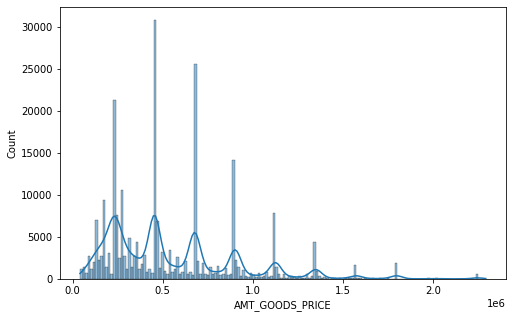

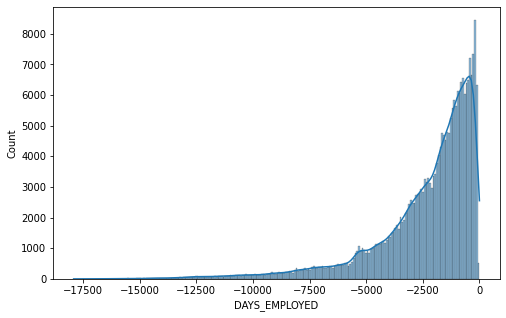

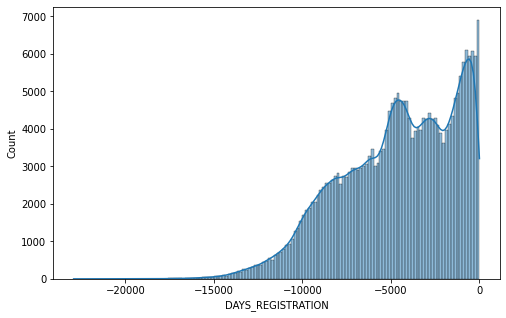

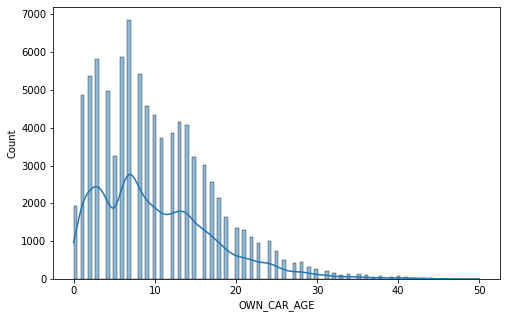

In [25]:
for i in outlier_cols:
    fig = plt.figure(figsize=(8,5))
    sns.histplot(x = i, data= df, kde = True)
    plt.show()

# BIIVARIATE Analysis: -

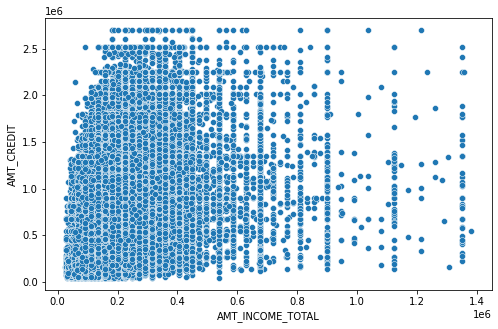

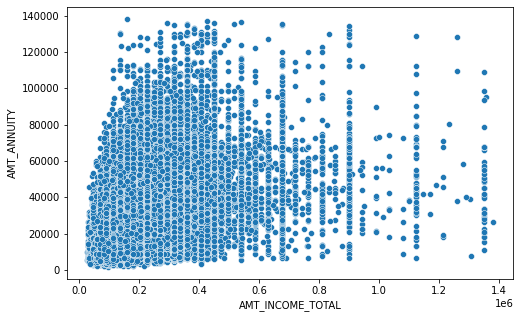

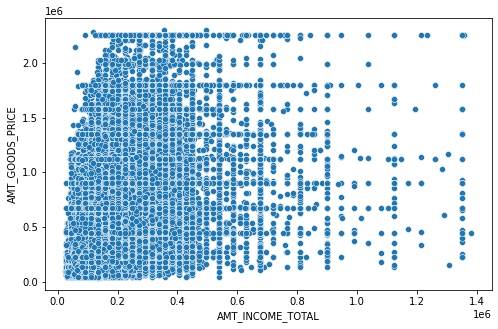

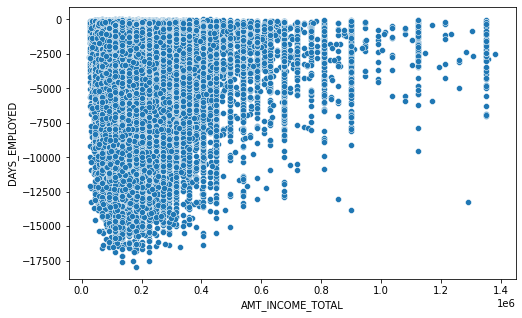

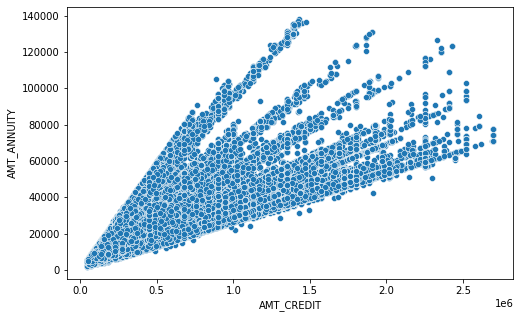

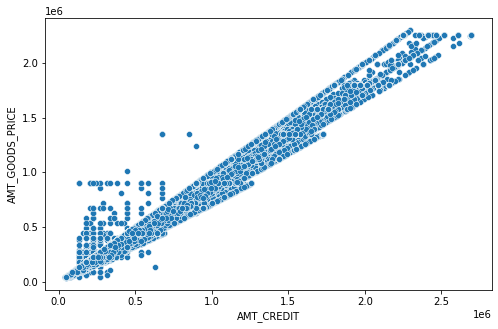

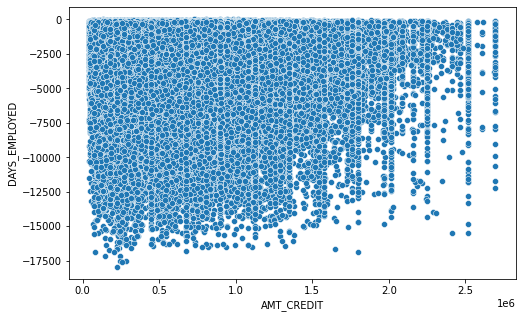

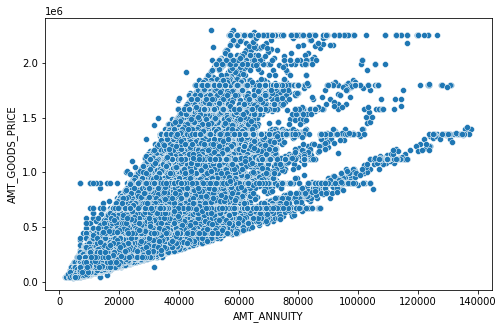

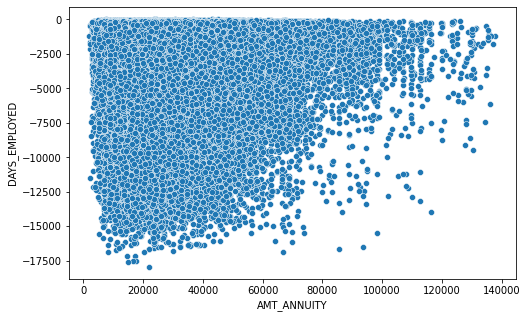

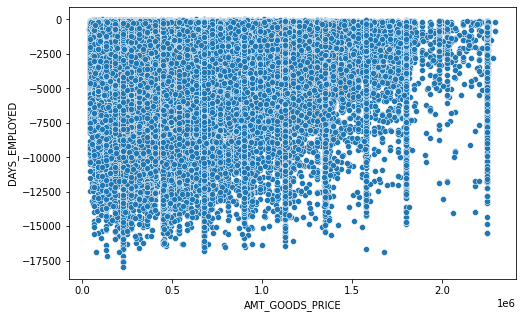

In [26]:
for i in range(5):
    for j in range(i, 5):
        if outlier_cols[i] == outlier_cols[j]: continue
        fig = plt.figure(figsize=(8,5))
        sns.scatterplot(x=outlier_cols[i], y=outlier_cols[j], data = df)
        plt.show()

## Insights: -

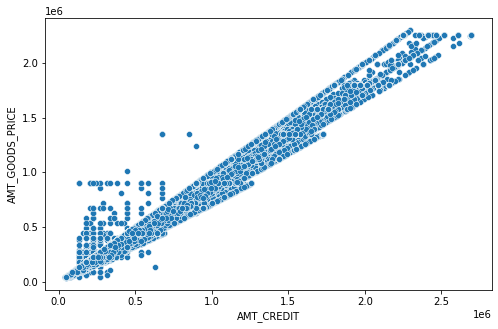

In [27]:
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x = 'AMT_CREDIT', y='AMT_GOODS_PRICE', data = df)
plt.show()

## `AMT_CREDIT`: Loan to be paid back with interest.
## `AMT_GOODS_PRICE`: For consumer loans it is the price of the goods for which the loan is given.


### Data which is scattered like a square and is above the linear line is where goods price is greater than the loan applied for which is the case when the loaner needs only some amount of money for the goods.

### Data which is less than the loan is basically when the customer needs modification to his goods which exceeds the goods price.


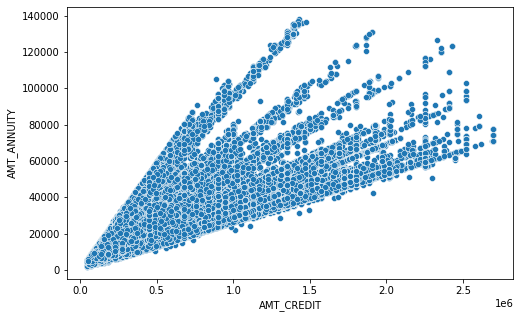

In [28]:
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data = df)
plt.show()

## `AMT_CREDIT`: Loan to be paid back with interest.
## `AMT_ANNUITY`:  fixed amount of money paid back to the loaner.

### There is a linear relation between these two variables.


## Correlation: -

In [29]:
corr_matrix = df[outlier_cols].corr()
corr_matrix

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE
AMT_INCOME_TOTAL,1.000000,0.376616,0.447842,0.383551,-0.036731,0.037952,-0.191114
AMT_CREDIT,0.376616,1.000000,0.763824,0.986318,-0.091736,-0.018027,-0.097969
AMT_ANNUITY,0.447842,0.763824,1.000000,0.767454,-0.053438,0.009570,-0.098465
AMT_GOODS_PRICE,0.383551,0.986318,0.767454,1.000000,-0.093985,-0.015163,-0.111953
DAYS_EMPLOYED,-0.036731,-0.091736,-0.053438,-0.093985,1.000000,0.171811,0.022025
DAYS_REGISTRATION,0.037952,-0.018027,0.009570,-0.015163,0.171811,1.000000,-0.030778
OWN_CAR_AGE,-0.191114,-0.097969,-0.098465,-0.111953,0.022025,-0.030778,1.000000


# TOP 10 Corelated Features: -

In [30]:
sorted_corr_matrix = corr_matrix.unstack().sort_values(ascending=False)
top_10 = sorted_corr_matrix[7: 17].to_frame().rename(columns={0: 'Correlation Value'})
top_10

Correlation Value
AMT_CREDIT       AMT_GOODS_PRICE            0.986318
AMT_GOODS_PRICE  AMT_CREDIT                 0.986318
                 AMT_ANNUITY                0.767454
AMT_ANNUITY      AMT_GOODS_PRICE            0.767454
AMT_CREDIT       AMT_ANNUITY                0.763824
AMT_ANNUITY      AMT_CREDIT                 0.763824
AMT_INCOME_TOTAL AMT_ANNUITY                0.447842
AMT_ANNUITY      AMT_INCOME_TOTAL           0.447842
AMT_GOODS_PRICE  AMT_INCOME_TOTAL           0.383551
AMT_INCOME_TOTAL AMT_GOODS_PRICE            0.383551

### The highest correlation value being: 0.9863. 
### Their first two features relation have been visualized in the above slides which shows that they are strictly linear which shows that the loan applied for is strictly for the goods price only 98.63% of the times.
### The rest 1.37 % is also for goods but only a part of the goods amount was needed, or more than the price of goods were needed (maybe for some modifications to be done on the goods itself).